In [1]:
from importlib import import_module

import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np

In [2]:
data = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Descriptive Analysis: 


1. Measure of Central Tendency: mean, median, and mode for numerical variables.

In [4]:
data['math score'].mean()

np.float64(66.089)

In [5]:
data['math score'].median()

np.float64(66.0)

In [6]:
data['math score'].mode()[0]

np.int64(65)

2. Measures of Spread: variance, standard deviation, and interquartile range (IQR).

In [7]:
data['math score'].var()

np.float64(229.91899799799796)

In [8]:
data['math score'].std()

np.float64(15.16308009600945)

In [9]:
np.percentile(data['math score'], 75) - np.percentile(data['math score'], 25)

np.float64(20.0)

As IQR ≈ 1.35*SD, the data seems to be normally distributed.

3. Distribution Shapes: skewness and kurtosis to understand the asymmetry and peakedness of the data distribution.

In [10]:
skew(data['math score'])

np.float64(-0.278516571914075)

Data seems to be a lil left skewed.

In [11]:
kurtosis(data['math score'])

np.float64(0.26759715461497846)

# Probability Theory

In [12]:
#P(math_score_above_80)
len(data[data['math score']>80])/len(data)

0.176

In [13]:
#P(math_reading_above_80)
len(data[data['reading score']>80])/len(data)

0.235

In [14]:
#P(math_math_above_80|math_reading_above_80)
len(data[(data['reading score']>80) & (data['math score']>80)])/len(data)

0.131

As P(math_math_above_80|math_reading_above_80) != P(math_math_above_80) thus the two variables are not independent.

# Statistical Inference

Hypothesis Testing - testing the Hypothesis $H_1$: the mean of math score is 70.

We start with t-test that gives a yes/no answer that if the sample mean significantly different from the hypothesized mean? \ 
The method ttest_1samp returns,\
- t_stat: which indicates how far our sample mean is from the hypothesized mean (70) in terms of standard error units.
- p_value: it helps us decide whether to reject the null hypothesis (that the mean is 70). We reject the null hypothesis if p-value is less than 0.05.

In [15]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(data['math score'], 70)

In [16]:
t_stat

np.float64(-8.156435137590153)

In [17]:
p_value
# p-value is really small thus we can reject the null hypothesis H1.

np.float64(1.0291264341623114e-15)

# Confidence interval calculation
First we calculate Standard Error of the mean ($SEM$), $$SEM = (Standard Deviation)/\sqrt{n}$$\
We multiply SEM with 1.96 (For a normal distribution, about 95% of values lie within 1.96 standard deviations from the mean), this gives us margin of error, which quantifies how much variability we expect in our estimate of the mean. Then we calculate confidence interval using the margin to define an interval around the sample mean.

In [18]:
mean = data['math score'].mean()
sem = data['math score'].sem()

margin_of_error = sem * 1.96
(mean - margin_of_error, mean + margin_of_error)

(np.float64(65.1491825588397), np.float64(67.0288174411603))

# Sampling and Data Distributions

Central Limit Theorem (CLT): Demonstrate that the sampling distribution of the sample mean approaches a normal distribution. In simple terms if you take sufficiently large samples from a population, the samples' means will be normally distributed, even if the population isn't normally distributed.

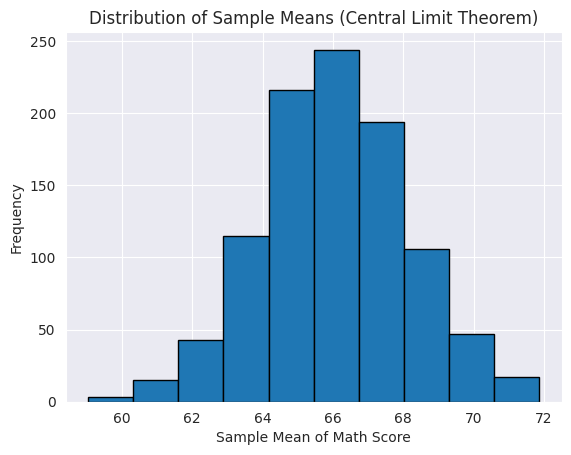

In [19]:
import matplotlib.pyplot as plt

sample_means = [data.sample(50)['math score'].mean() for _ in range(1000)]
plt.hist(sample_means, edgecolor='k')
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample Mean of Math Score")
plt.ylabel("Frequency")
plt.show()

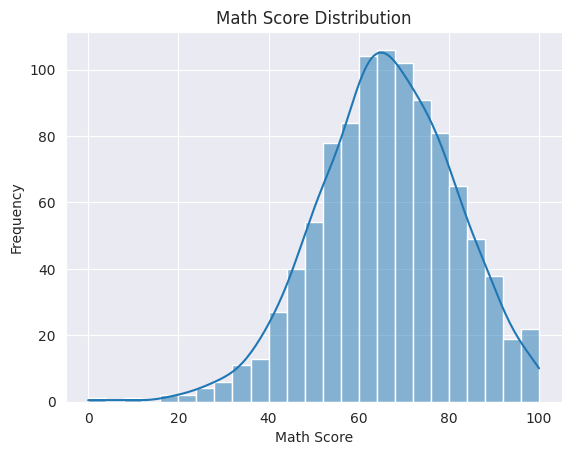

In [20]:
import seaborn as sns
sns.histplot(data['math score'], kde=True)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

Exploratory Data Analysis (EDA)

    Data Visualization: Histograms, scatter plots, box plots, heatmaps, correlation matrices.
    Data Cleaning and Preprocessing: Handling missing data, outliers, feature scaling, encoding categorical variables.
    Feature Engineering: Creation of new features, polynomial features, interaction terms.